In [1]:
import sys
sys.path.append('..')

In [2]:
from config_simulation import (
    algorithms,
    simulation_linear_regression,
    simulation_logistic_regression,
    simulation_geometric_median,
    simulation_spherical_distribution,
    simulation_p_means,
    eval_covtype,
)

SGD = algorithms.SGD
WASGD = algorithms.WASGD
SNARiccati = algorithms.SNARiccati
WASNARiccati = algorithms.WASNARiccati
USNA = algorithms.USNA
UWASNA = algorithms.UWASNA
SNA = algorithms.SNA
WASNA = algorithms.WASNA


N = 20
n = 10_000

optimizer_list = [
    WASGD(tau=0.0),  # ASGD
    WASGD(),
    SNARiccati(),
    WASNARiccati(),
    WASNARiccati(compute_hessian_theta_avg=False),
    USNA(c_nu=5.0), # faster rate for USNA ? advised by Antoine to match other algorithms
    USNA(c_nu=5.0, generate_Z="normal"),
    UWASNA(c_nu = 5.0),
    UWASNA(c_nu = 5.0, compute_hessian_theta_avg=False),
    UWASNA(c_nu = 5.0, use_hessian_avg=False),
    UWASNA(c_nu = 5.0, compute_hessian_theta_avg=False, use_hessian_avg=False),
    UWASNA(c_nu = 5.0, generate_Z="normal"),
]

import copy
optimizer_list_without_riccati = copy.deepcopy(optimizer_list)
optimizer_list_without_riccati[2] = SNA()
optimizer_list_without_riccati[3] = WASNA()
optimizer_list_without_riccati[4] = WASNA(compute_hessian_theta_avg=False)

In [3]:
# N = 2
# n = 1000

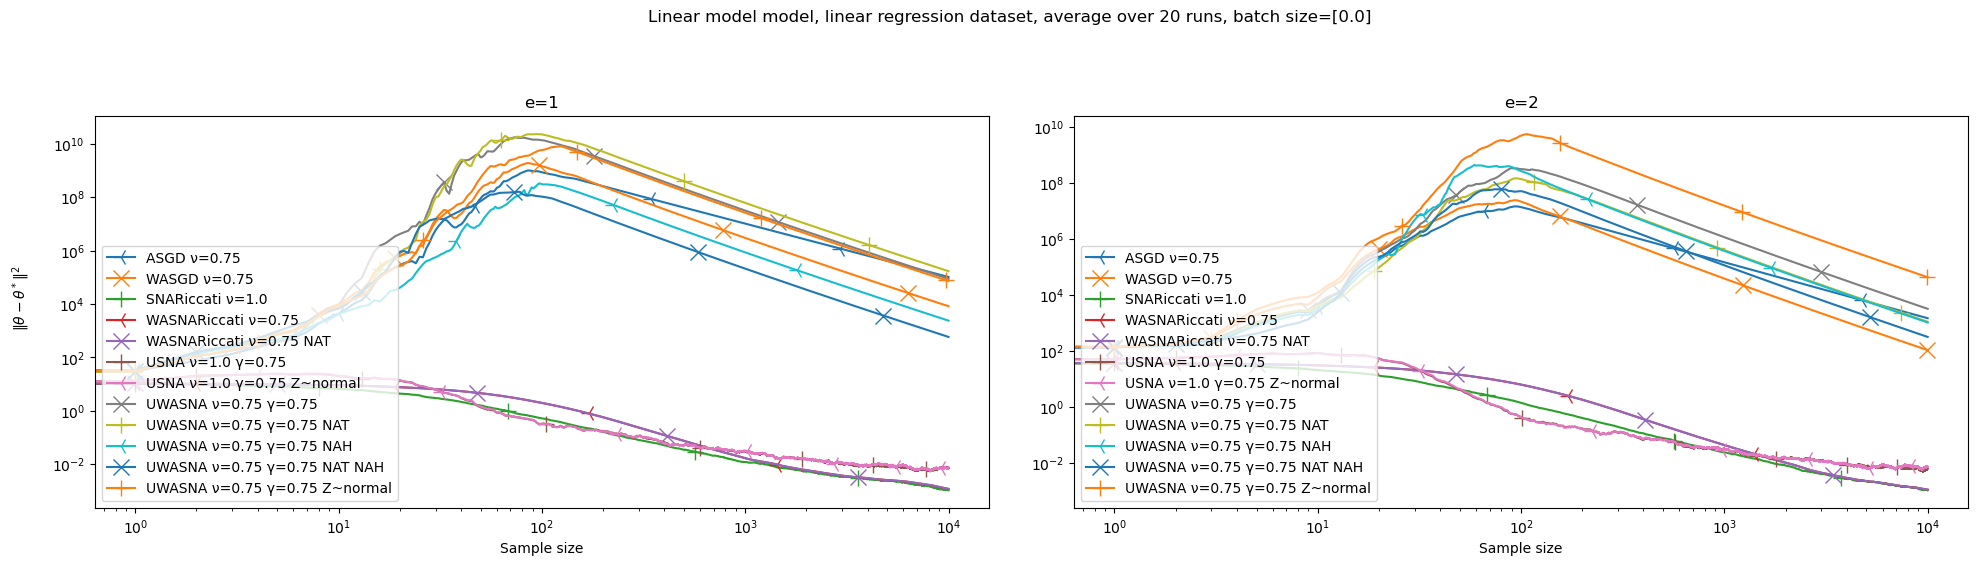

In [4]:
simulation = simulation_linear_regression(optimizer_list=optimizer_list)
simulation.run_multiple_track_errors(N=N, n=n)

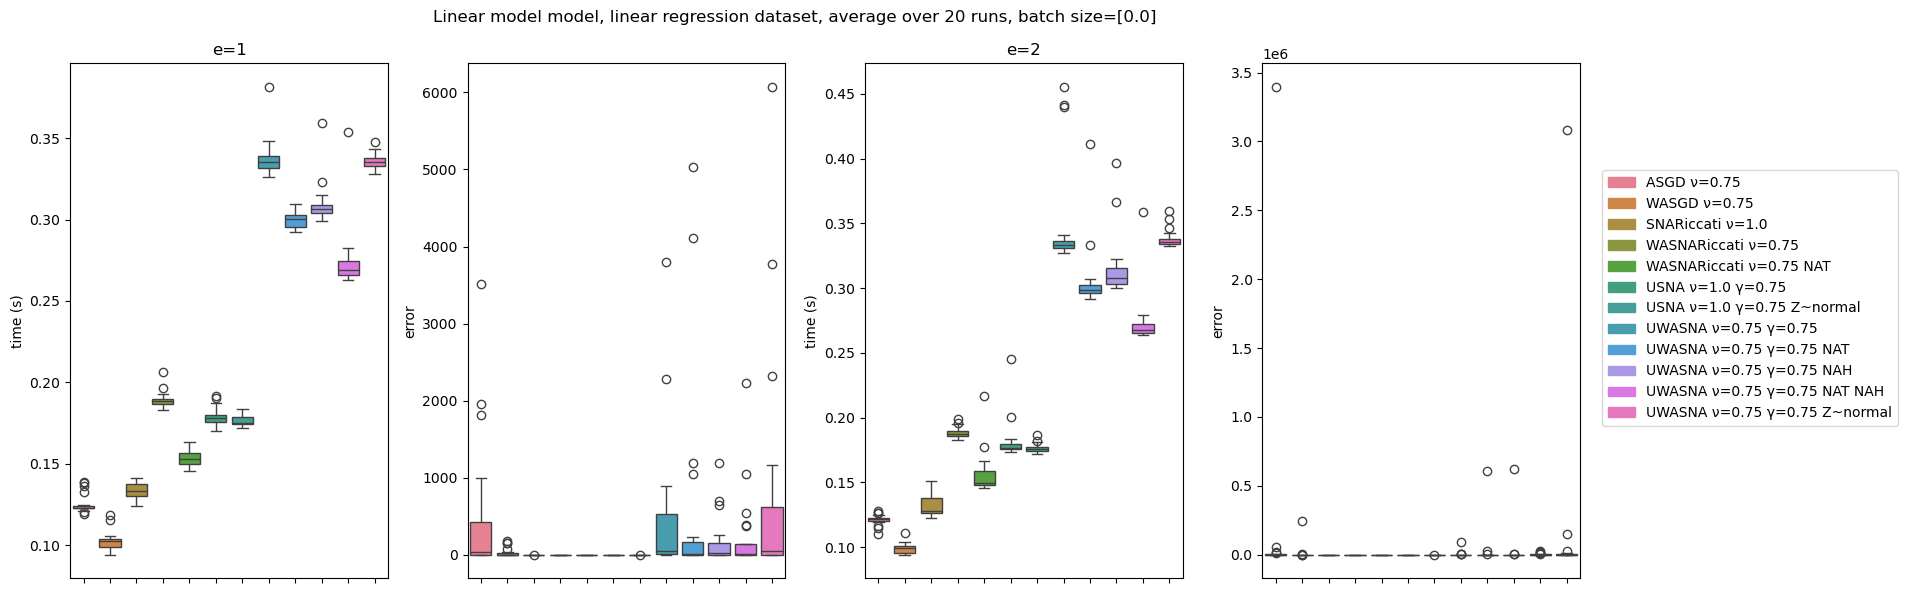

In [5]:
simulation.run_multiple_track_time(N=N, n=n)

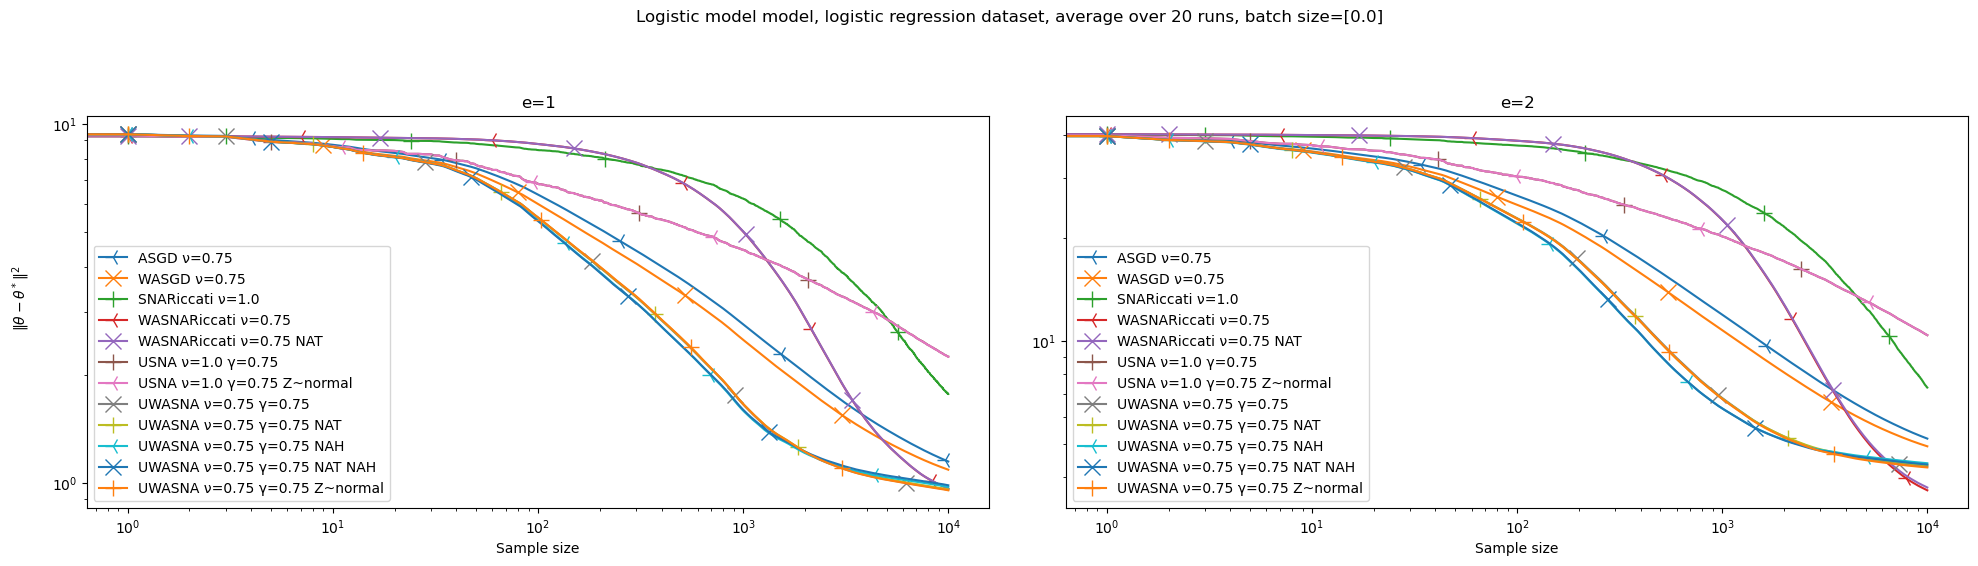

In [6]:
simulation = simulation_logistic_regression(optimizer_list=optimizer_list)
simulation.run_multiple_track_errors(N=N, n=n)

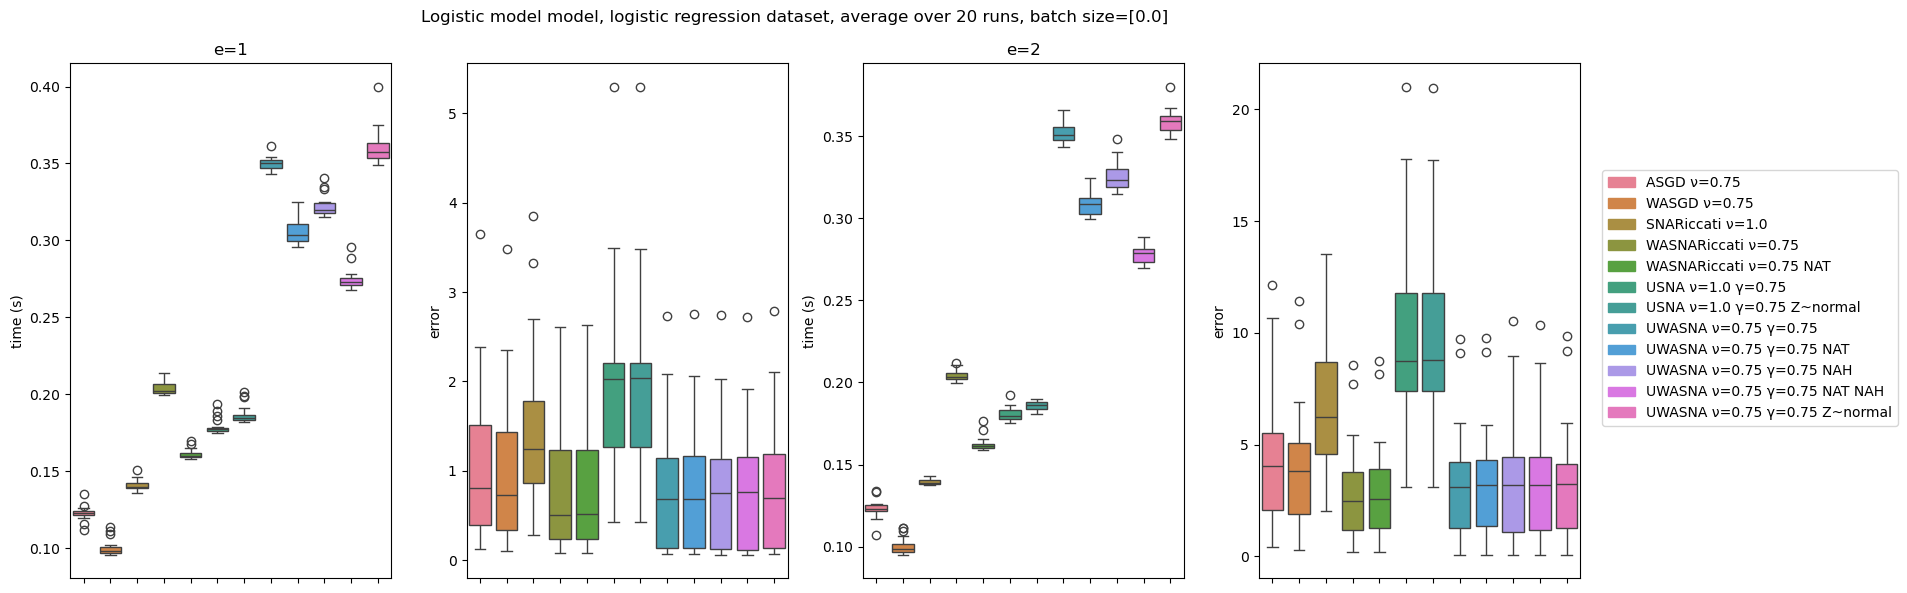

In [7]:
simulation.run_multiple_track_time(N=N, n=n)

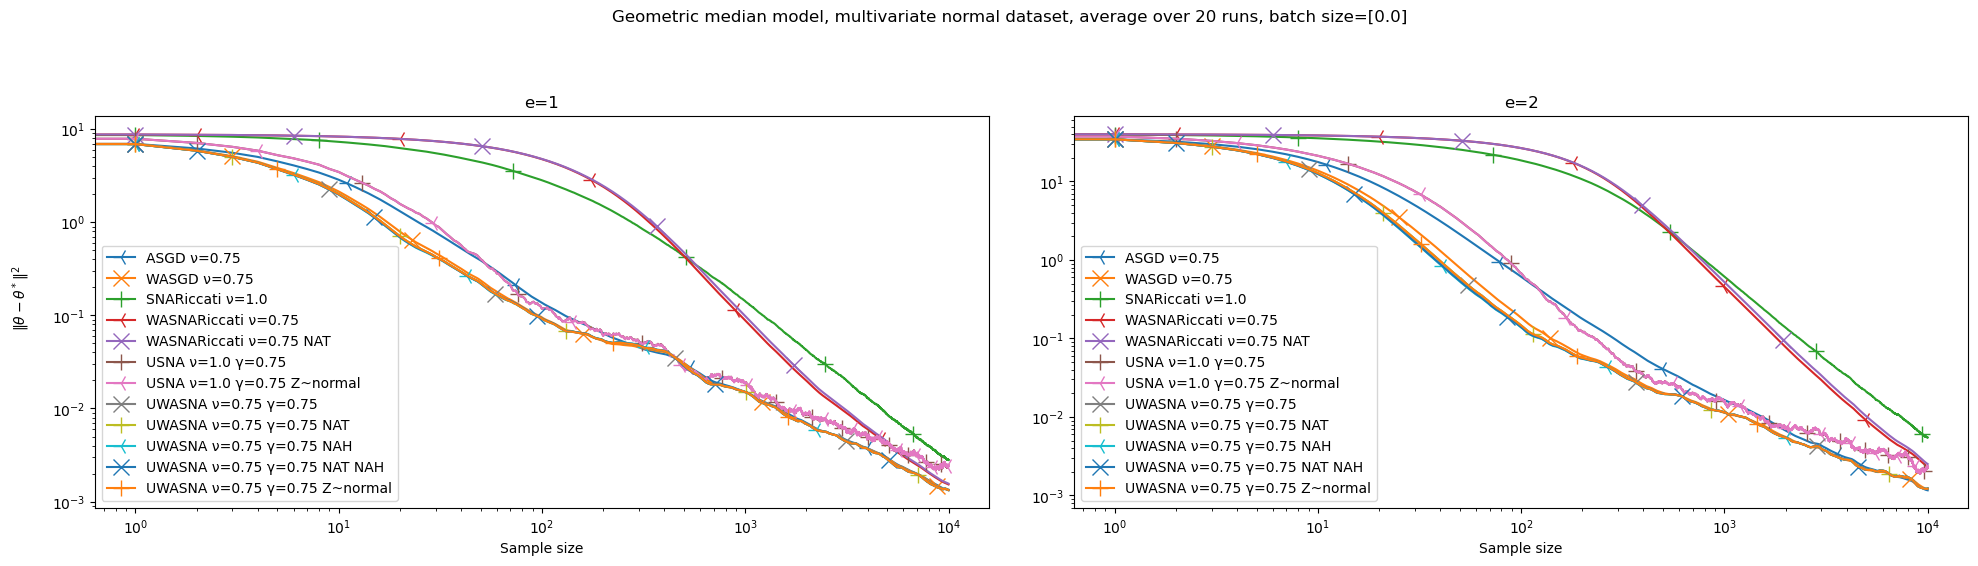

In [8]:
simulation = simulation_geometric_median(optimizer_list=optimizer_list)
simulation.run_multiple_track_errors(N=20, n=n)

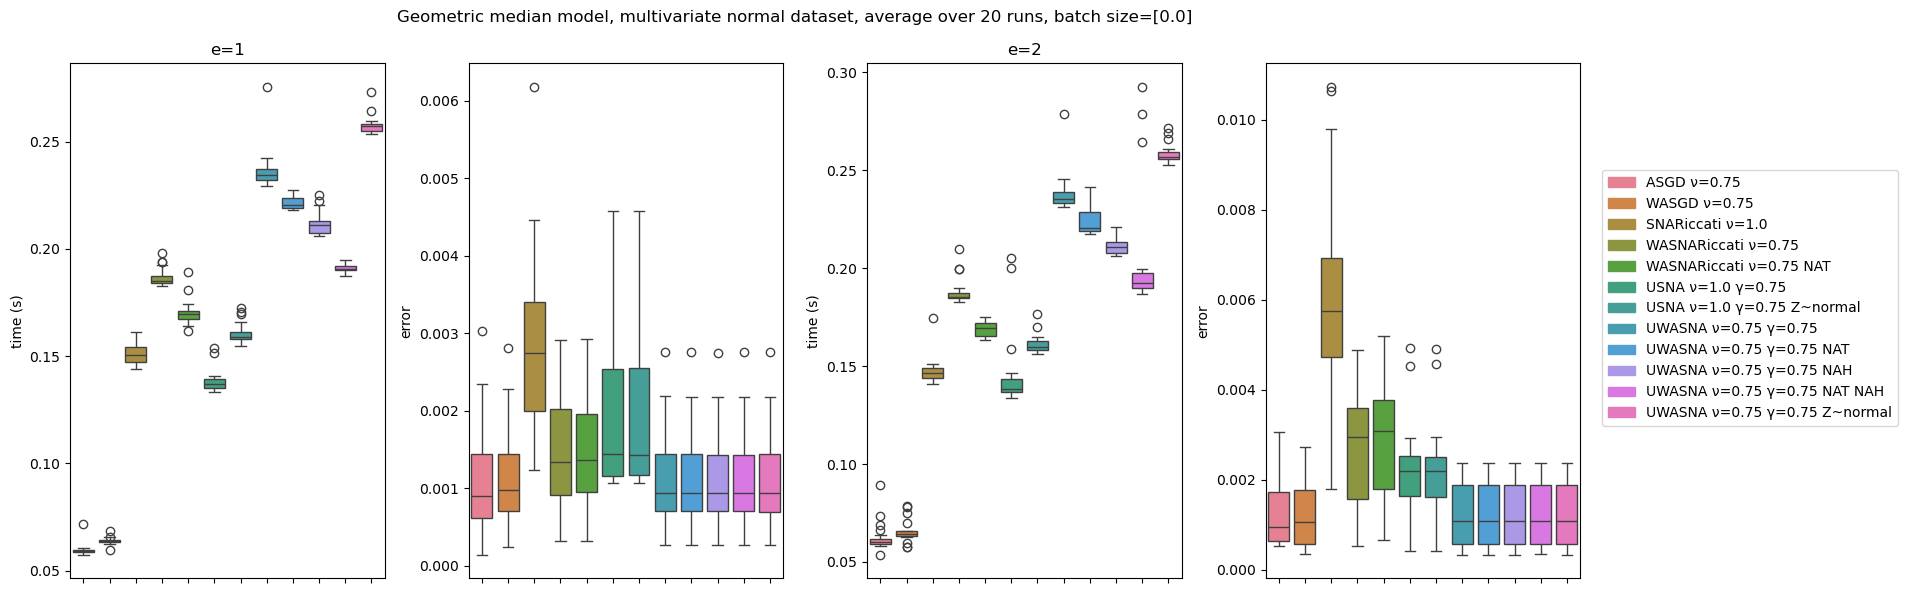

In [9]:
simulation.run_multiple_track_time(N=N, n=n)

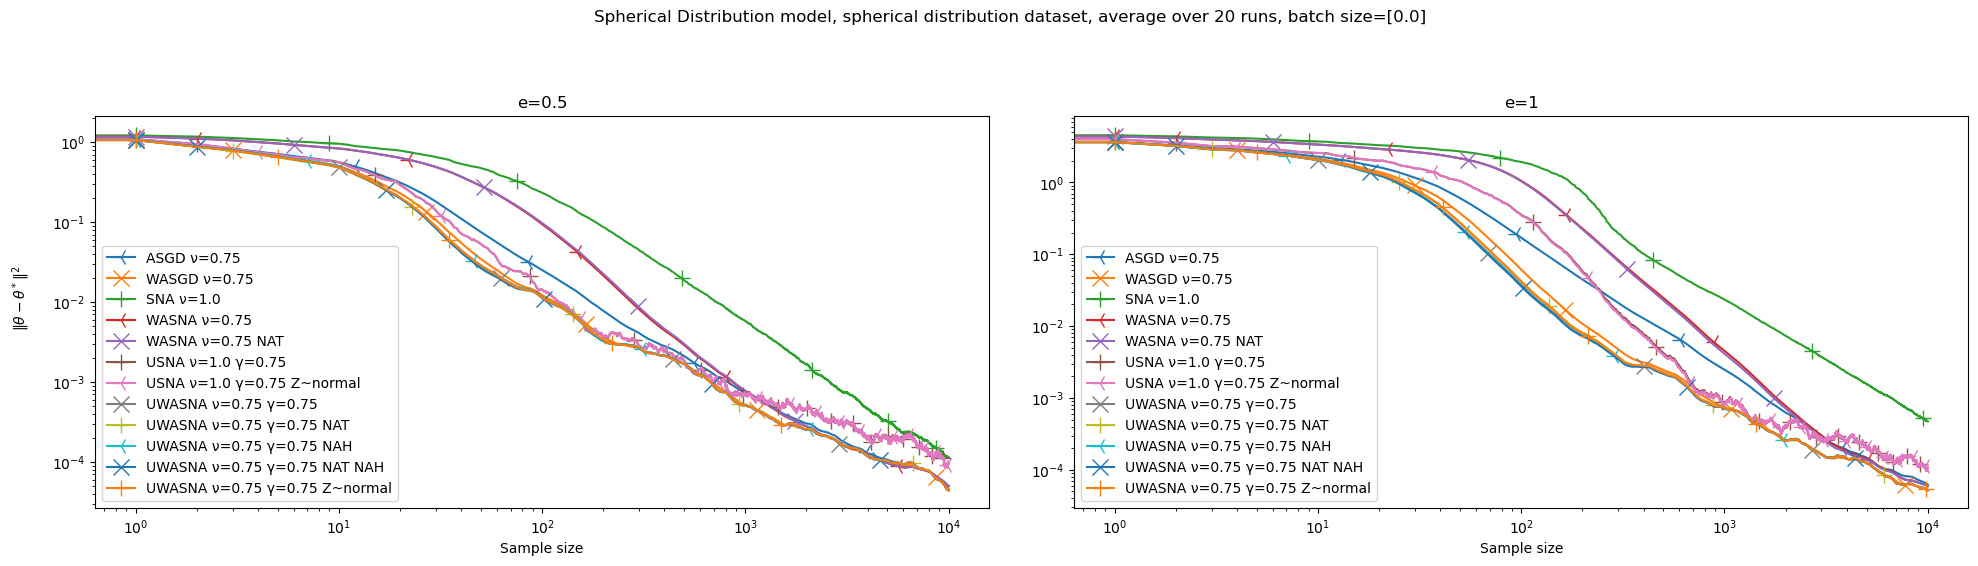

In [10]:
simulation = simulation_spherical_distribution(
    optimizer_list=optimizer_list_without_riccati
)
simulation.run_multiple_track_errors(N=N, n=n)

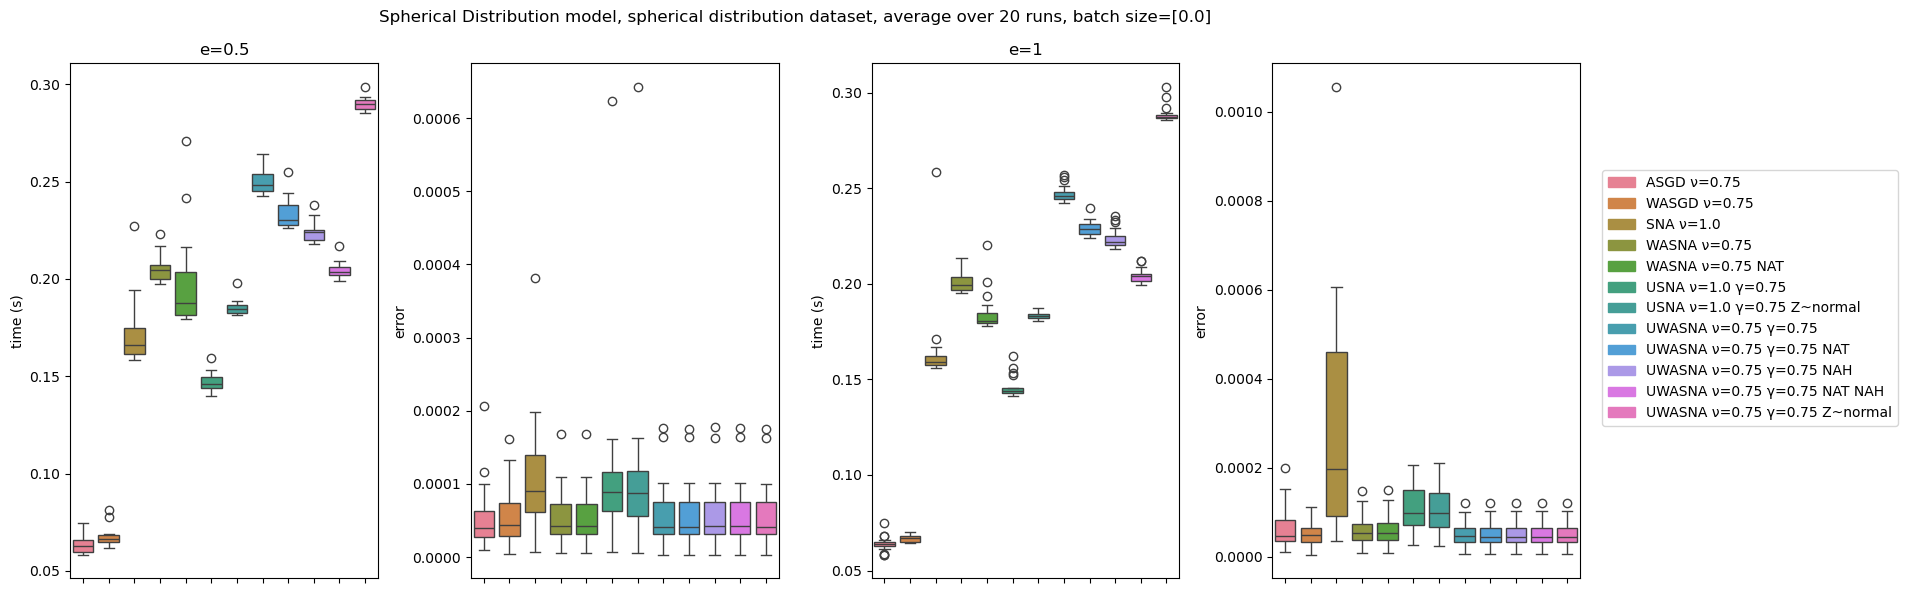

In [11]:
simulation.run_multiple_track_time(N=N, n=n)

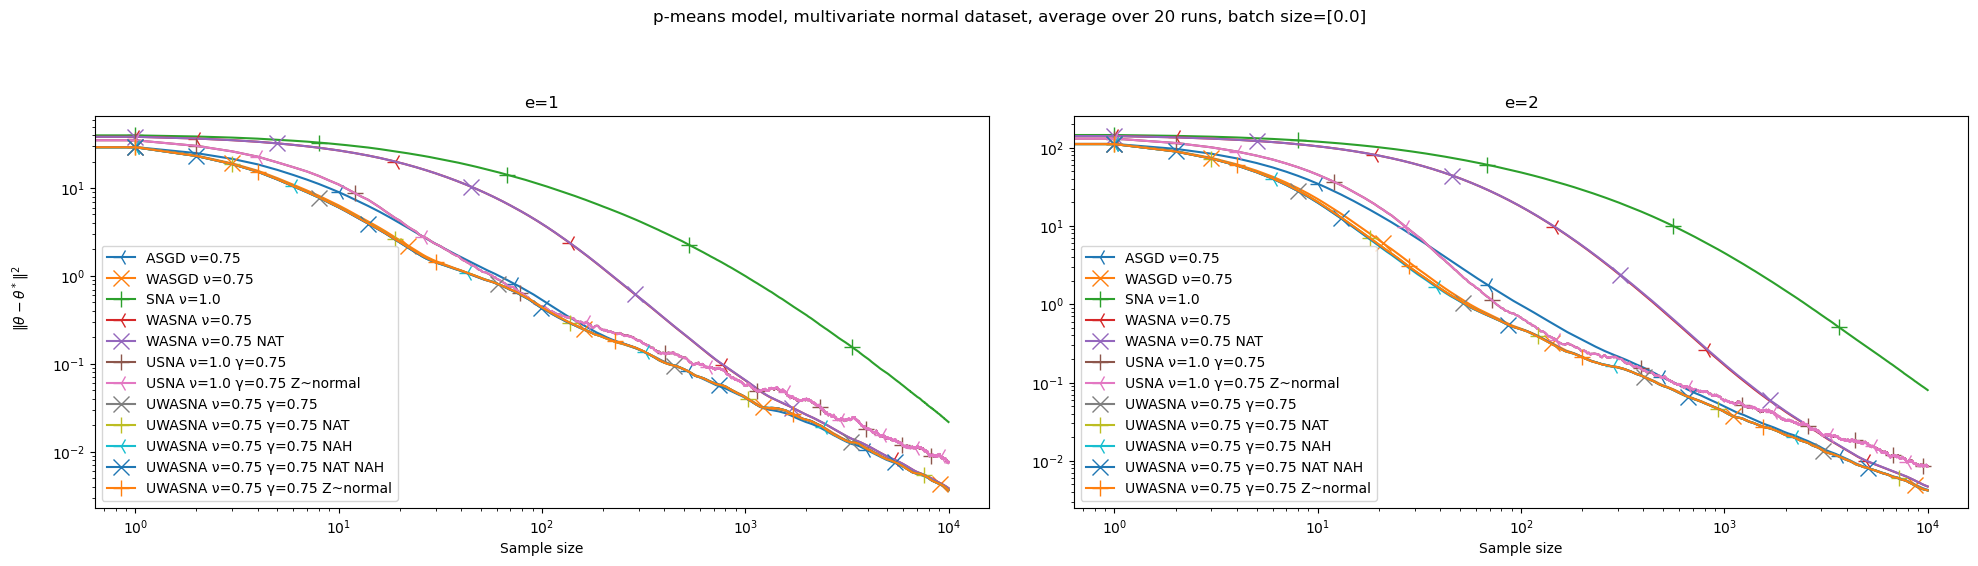

In [12]:
simulation = simulation_p_means(optimizer_list=optimizer_list_without_riccati)
simulation.run_multiple_track_errors(N=N, n=n)

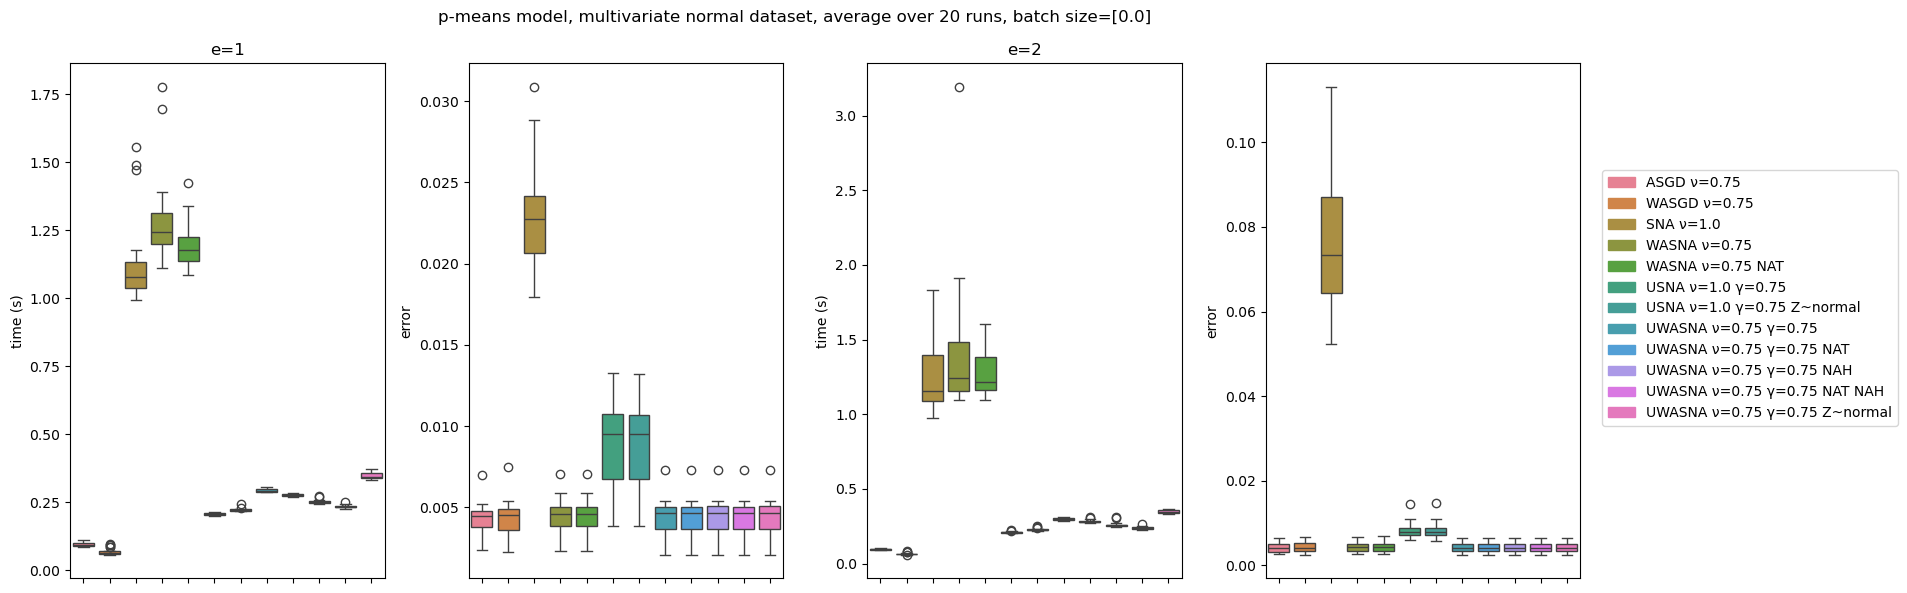

In [13]:
simulation.run_multiple_track_time(N=N, n=n)

In [14]:
eval = eval_covtype(optimizer_list=optimizer_list)
_, _ = eval.run_track_time()

,ASGD ν=0.75,WASGD ν=0.75,SNARiccati ν=1.0,WASNARiccati ν=0.75,WASNARiccati ν=0.75 NAT,USNA ν=1.0 γ=0.75,USNA ν=1.0 γ=0.75 Z~normal,UWASNA ν=0.75 γ=0.75,UWASNA ν=0.75 γ=0.75 NAT,UWASNA ν=0.75 γ=0.75 NAH,UWASNA ν=0.75 γ=0.75 NAT NAH,UWASNA ν=0.75 γ=0.75 Z~normal
Training Accuracy,0.726070,0.729962,0.765435,0.718000,0.712163,0.677566,0.364806,0.726972,0.726924,0.726750,0.726924,0.727357
Test Accuracy,0.728079,0.731479,0.766985,0.721195,0.715016,0.679965,0.363803,0.729620,0.729680,0.729577,0.729646,0.729947


In [15]:
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [16]:
eval = eval_covtype(optimizer_list=[SNARiccati()])
_, _ = eval.run_track_time()
print(eval.theta)

,SNARiccati ν=1.0
Training Accuracy,0.765435
Test Accuracy,0.766985


[-0.39  0.01 -0.   -0.09 -0.   -0.   -0.   -0.08  0.04 -0.06 -0.    0.45
 -0.36 -0.04 -0.43 -0.03 -0.2  -0.09 -0.22 -0.01 -0.08 -0.04 -0.03  0.14
 -0.17 -0.1  -0.56 -0.18 -0.01 -0.    0.15  0.01 -0.05  0.33  0.6   0.47
  1.11  0.77  0.56 -0.08 -0.05  0.28 -0.08 -0.09 -0.19  0.51  0.07  0.49
 -0.25 -0.55 -0.06 -0.37 -0.72 -0.69 -0.97]


In [17]:
eval = eval_covtype(optimizer_list=[USNA(generate_Z="normal")])
_, _ = eval.run_track_time()
print(eval.theta)

,USNA ν=1.0 γ=0.75 Z~normal
Training Accuracy,0.365279
Test Accuracy,0.364414


[  -0.39 -158.49 -296.95    3.23 1502.8   442.78 8394.28   15.8  -178.17
 -274.27   77.81    4.24   -0.96   -2.46   -1.22   -0.04   -0.08   -0.39
    0.2    -0.02   -0.06   -0.     -0.     -0.01   -1.13   -0.32    0.58
    0.07   -0.      0.     -0.09   -0.04   -0.02    0.1     0.53    0.18
   -0.9    -0.04   -0.34   -0.     -0.01    0.1     0.12    0.8     0.53
   -1.07   -1.05    1.76    0.02   -0.28   -0.     -0.01    0.      0.72
   -0.19]


In [18]:
eval = eval_covtype(optimizer_list=[UWASNA()])
_, _ = eval.run_track_time()
print(eval.theta)

,UWASNA ν=0.75 γ=0.75
Training Accuracy,0.727217
Test Accuracy,0.729697


[  -3.95   63.87  -12.7  -300.18  -14.27  -69.17   -0.4  -449.51 -268.14
 -178.03   -1.97    3.96    2.32   -7.31   -2.9    -0.24   -0.47   -0.27
   -1.11   -0.12   -0.43   -0.02    0.01    0.     -4.39   -1.29   -3.81
   -2.3    -0.05    0.     -0.11   -0.29   -0.13    0.68    0.9     0.39
    8.35   10.03   -0.01   -0.04   -0.24    0.27   -0.24   -3.49   -2.09
    0.96   -0.21   -0.78   -0.34   -0.17   -0.04   -0.23   -0.79   -1.12
   -0.73]
